In [11]:

# 1 Cargar el archivo y normalizar los nombres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reemplaza el nombre del archivo con el que quieres evaluar y modificar
nombre_archivo = "Totales Accesos por rango.csv"

# Ruta completa al archivo
ruta_completa = os.path.join(r"C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PROYECTO_IND_2\DATASET_LIMPIO", nombre_archivo)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(ruta_completa):
	# Cargar el archivo CSV
	df = pd.read_csv(ruta_completa)
	print("Archivo cargado exitosamente.")
else:
	print(f"Error: El archivo '{ruta_completa}' no existe.")



Archivo cargado exitosamente.


In [12]:
# Verificar si existe la columna "Trimestre"
if 'Trimestre' in df.columns:
    # Convertir la columna "Trimestre" a tipo int64 si no lo es
    if not pd.api.types.is_integer_dtype(df['Trimestre']):
        try:
            # Intentar convertir a int64
            df['Trimestre'] = df['Trimestre'].astype('int64')
            print("La columna 'Trimestre' ha sido convertida a int64.")
        except ValueError as e:
            print(f"No se pudo convertir la columna 'Trimestre' a int64 debido a un error: {e}")
            # Manejar valores no convertibles, como NaN o strings
            df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').astype('Int64')
            print("Los valores no válidos han sido convertidos a NaN y el tipo de la columna es Int64.")
    else:
        print("La columna 'Trimestre' ya es de tipo int64.")
else:
    print("La columna 'Trimestre' no existe en el DataFrame.")


La columna 'Trimestre' ya es de tipo int64.


In [13]:
# Crear la columna 'Trimestre_Label' basada en 'Trimestre'
if 'Trimestre' in df.columns:
    # Asegurar que 'Trimestre' esté en tipo entero
    df['Trimestre'] = df['Trimestre'].astype(int)

    # Mapear los valores de trimestre a etiquetas descriptivas
    trimestre_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
    df['Trimestre_Label'] = df['Trimestre'].map(trimestre_labels)
    print("Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.")
else:
    print("La columna 'Trimestre' no existe. No se pudo crear 'Trimestre_Label'.")


Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.


In [14]:
# Mostrar información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Año                      42 non-null     object
 1   Trimestre                42 non-null     int64 
 2   Hasta 512 kbps           42 non-null     int64 
 3   Entre 512 Kbps y 1 Mbps  42 non-null     int64 
 4   Entre 1 Mbps y 6 Mbps    42 non-null     int64 
 5   Entre 6 Mbps y 10 Mbps   42 non-null     int64 
 6   Entre 10 Mbps y 20 Mbps  42 non-null     int64 
 7   Entre 20 Mbps y 30 Mbps  42 non-null     int64 
 8   Más de 30 Mbps           42 non-null     int64 
 9   OTROS                    42 non-null     int64 
 10  Total                    42 non-null     int64 
 11  Trimestre_Label          42 non-null     object
dtypes: int64(10), object(2)
memory usage: 4.1+ KB
None


In [15]:
# Normalizar los nombres de columnas si existen
columnas_a_normalizar = ['Provincia', 'Partido', 'Localidad']
for columna in columnas_a_normalizar:
    if columna in df.columns:
        df[columna] = df[columna].str.strip().str.upper()


In [16]:
# 2: Reemplazar variaciones específicas

# Reemplazar variaciones específicas en 'Provincia' si existe
if 'Provincia' in df.columns:
    df['Provincia'] = df['Provincia'].replace({
        'BS AS': 'BUENOS AIRES',
        'CABA': 'BUENOS AIRES',
        'CIUDAD AUTONOMA DE BUENOS AIRES': 'BUENOS AIRES',
        'CAPITAL FEDERAL': 'BUENOS AIRES',
        'CORDOBA': 'CÓRDOBA',
        'ENTRE RIOS': 'ENTRE RÍOS',
        'RIO NEGRO': 'RÍO NEGRO',
        'TUCUMAN': 'TUCUMÁN',
        'NEUQUEN': 'NEUQUÉN'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Provincia' después de los reemplazos:")
    print(df['Provincia'].unique())
else:
    print("La columna 'Provincia' no existe en el DataFrame.")

# Reemplazar valores en 'Partido' si existe
if 'Partido' in df.columns:
    df['Partido'] = df['Partido'].replace({
        'SAN ISIDRO': 'SAN ISIDRO',
        'TIGRE': 'TIGRE'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Partido' después de los reemplazos:")
    print(df['Partido'].unique())
else:
    print("La columna 'Partido' no existe en el DataFrame.")

# Reemplazar valores en 'Localidad' si existe
if 'Localidad' in df.columns:
    df['Localidad'] = df['Localidad'].replace({
        'VICENTE LOPEZ': 'VICENTE LÓPEZ',
        'SAN FERNANDO': 'SAN FERNANDO'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Localidad' después de los reemplazos:")
    print(df['Localidad'].unique())
else:
    print("La columna 'Localidad' no existe en el DataFrame.")


La columna 'Provincia' no existe en el DataFrame.
La columna 'Partido' no existe en el DataFrame.
La columna 'Localidad' no existe en el DataFrame.



Estadísticas descriptivas del DataFrame (incluyendo todas las columnas):
               Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
count           42  42.000000       42.000000                42.000000   
unique          11        NaN             NaN                      NaN   
top     2023-01-01        NaN             NaN                      NaN   
freq             4        NaN             NaN                      NaN   
mean           NaN   2.452381    46756.595238            215615.285714   
std            NaN   1.130560    48922.973593            192134.704593   
min            NaN   1.000000     5675.000000             28521.000000   
25%            NaN   1.250000    29027.750000             69951.750000   
50%            NaN   2.000000    34960.000000            150273.000000   
75%            NaN   3.000000    41057.500000            279159.250000   
max            NaN   4.000000   241713.000000            687619.000000   

        Entre 1 Mbps y 6 Mbps  Entre 

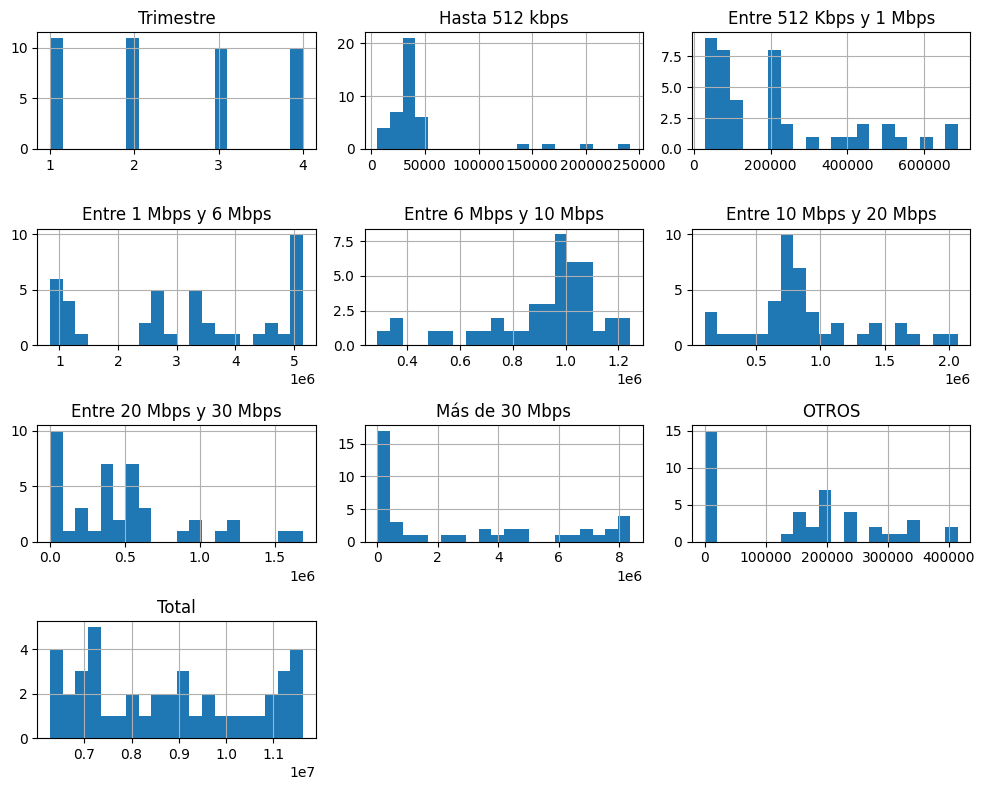

In [17]:
# 3: Estadísticas descriptivas y análisis exploratorio

# Estadísticas descriptivas para columnas numéricas y de tipo object
print("\nEstadísticas descriptivas del DataFrame (incluyendo todas las columnas):")
print(df.describe(include='all'))

# Histogramas de las columnas numéricas
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


Matriz de correlación entre columnas numéricas:
                         Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
Trimestre                 1.000000       -0.006068                -0.086527   
Hasta 512 kbps           -0.006068        1.000000                -0.099703   
Entre 512 Kbps y 1 Mbps  -0.086527       -0.099703                 1.000000   
Entre 1 Mbps y 6 Mbps    -0.008860        0.047988                 0.813476   
Entre 6 Mbps y 10 Mbps    0.108016       -0.043408                -0.923231   
Entre 10 Mbps y 20 Mbps   0.032846        0.018232                -0.386999   
Entre 20 Mbps y 30 Mbps   0.099801        0.502356                -0.517428   
Más de 30 Mbps           -0.002851       -0.095905                -0.698045   
OTROS                    -0.010735        0.090413                -0.753155   
Total                     0.023592        0.017614                -0.818908   

                         Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  \
Trimest

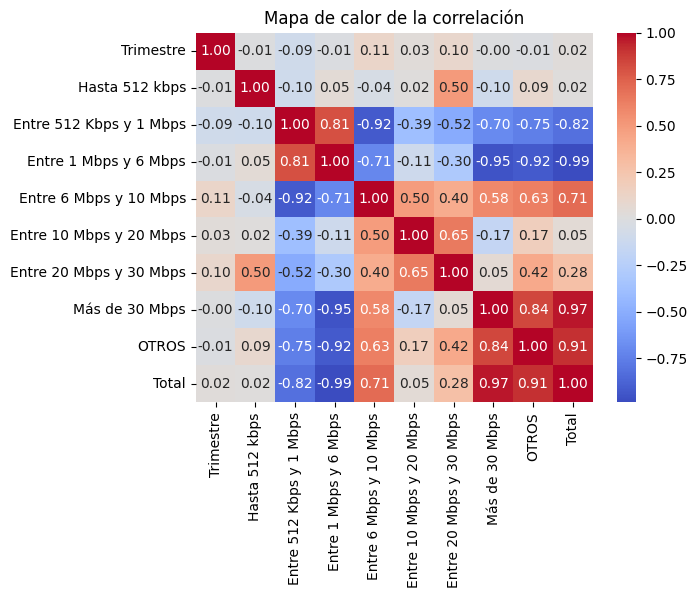

In [18]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not df_numerico.empty:
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Imprimir la matriz de correlación
    print("\nMatriz de correlación entre columnas numéricas:")
    print(correlacion)

    # Visualizar el mapa de calor de la correlación
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de calor de la correlación")
    plt.show()
else:
    print("\nNo hay columnas numéricas en el DataFrame para calcular la correlación.")


In [19]:
# Correlación entre columnas no numéricas usando tablas de contingencia
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)

Tabla de contingencia entre Año y Trimestre_Label:
Trimestre_Label  Q1  Q2  Q3  Q4
Año                            
2014-01-01        1   1   1   1
2015-01-01        1   1   1   1
2016-01-01        1   1   1   1
2017-01-01        1   1   1   1
2018-01-01        1   1   1   1
2019-01-01        1   1   1   1
2020-01-01        1   1   1   1
2021-01-01        1   1   1   1
2022-01-01        1   1   1   1
2023-01-01        1   1   1   1
2024-01-01        1   1   0   0
Tabla de contingencia entre Trimestre_Label y Año:
Año              2014-01-01  2015-01-01  2016-01-01  2017-01-01  2018-01-01  \
Trimestre_Label                                                               
Q1                        1           1           1           1           1   
Q2                        1           1           1           1           1   
Q3                        1           1           1           1           1   
Q4                        1           1           1           1           1   

Año    

Tabla de contingencia entre Año y Trimestre_Label:
Trimestre_Label  Q1  Q2  Q3  Q4
Año                            
2014-01-01        1   1   1   1
2015-01-01        1   1   1   1
2016-01-01        1   1   1   1
2017-01-01        1   1   1   1
2018-01-01        1   1   1   1
2019-01-01        1   1   1   1
2020-01-01        1   1   1   1
2021-01-01        1   1   1   1
2022-01-01        1   1   1   1
2023-01-01        1   1   1   1
2024-01-01        1   1   0   0


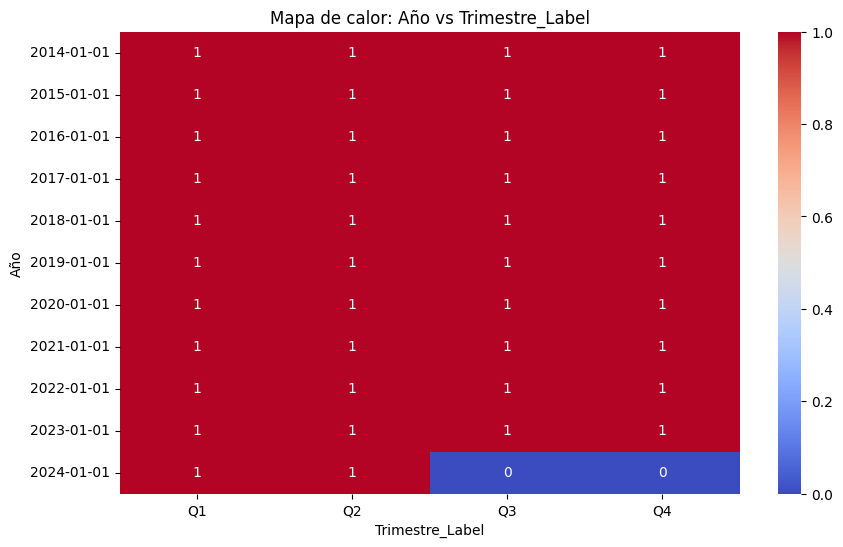

Tabla de contingencia entre Trimestre_Label y Año:
Año              2014-01-01  2015-01-01  2016-01-01  2017-01-01  2018-01-01  \
Trimestre_Label                                                               
Q1                        1           1           1           1           1   
Q2                        1           1           1           1           1   
Q3                        1           1           1           1           1   
Q4                        1           1           1           1           1   

Año              2019-01-01  2020-01-01  2021-01-01  2022-01-01  2023-01-01  \
Trimestre_Label                                                               
Q1                        1           1           1           1           1   
Q2                        1           1           1           1           1   
Q3                        1           1           1           1           1   
Q4                        1           1           1           1           1   


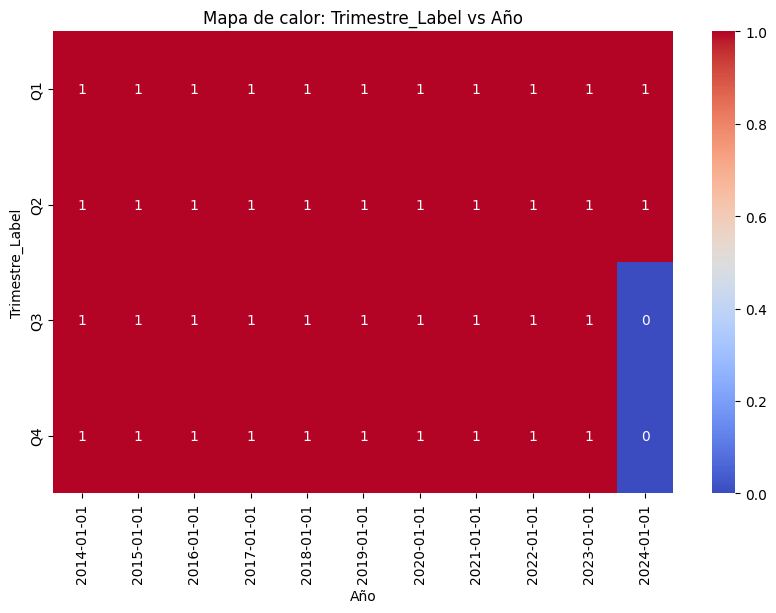

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Iterar sobre combinaciones de columnas categóricas (no numéricas)
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:  # Evitar el caso donde se compara una columna consigo misma
            # Crear tabla de contingencia
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)
            
            # Visualizar la tabla como un mapa de calor
            plt.figure(figsize=(10, 6))
            sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
            plt.title(f"Mapa de calor: {col1} vs {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()


In [21]:
#  6: Cálculo de Z-scores

from scipy.stats import zscore

# Calcular Z-scores para columnas numéricas
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
print("\nZ-scores de las columnas numéricas:")
print(z_scores)


Z-scores de las columnas numéricas:
    Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  Entre 1 Mbps y 6 Mbps  \
0   -0.404989       -0.384914                -0.782745              -1.523373   
1   -1.300229       -0.371467                -0.770466              -1.506450   
2    1.385490       -0.352702                -0.757892              -1.484214   
3    0.490250       -0.340993                -0.711182              -1.454638   
4   -0.404989       -0.329553                -0.717525              -1.442965   
5   -1.300229       -0.316933                -0.703602              -1.418158   
6    1.385490       -0.305678                -0.684533              -1.370087   
7    0.490250       -0.284328                -0.626276              -1.313944   
8   -0.404989       -0.270798                -0.611679              -1.293260   
9   -1.300229       -0.245497                -0.583539              -1.247494   
10   1.385490       -0.113673                -0.985570              -1.1

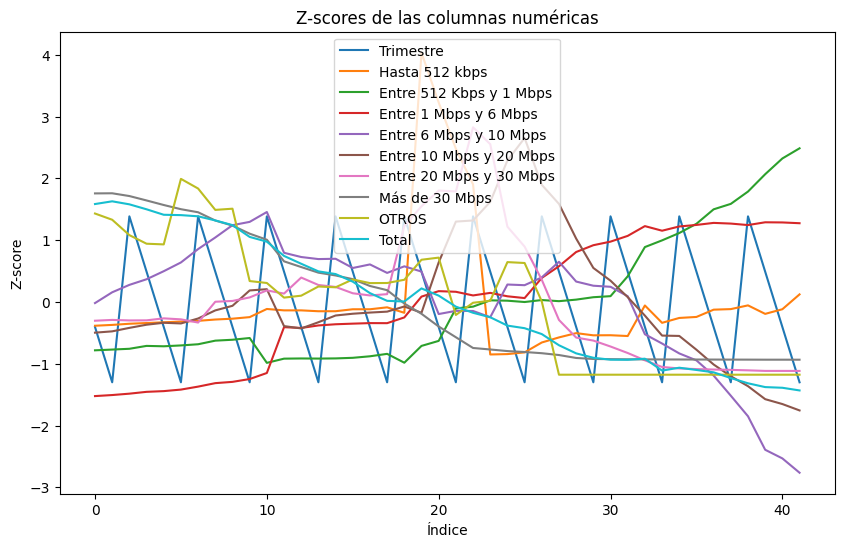

In [22]:
import matplotlib.pyplot as plt

# Graficar Z-scores de las columnas numéricas
plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.title('Z-scores de las columnas numéricas')
plt.xlabel('Índice')
plt.ylabel('Z-score')
plt.legend(z_scores.columns)  # Para mostrar el nombre de cada columna en la leyenda
plt.show()


In [23]:
# Conteo de categorías en columnas de tipo object
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nConteo de categorías en la columna '{col}':")
    print(df[col].value_counts())


Conteo de categorías en la columna 'Año':
Año
2023-01-01    4
2022-01-01    4
2021-01-01    4
2017-01-01    4
2020-01-01    4
2019-01-01    4
2018-01-01    4
2015-01-01    4
2016-01-01    4
2014-01-01    4
2024-01-01    2
Name: count, dtype: int64

Conteo de categorías en la columna 'Trimestre_Label':
Trimestre_Label
Q2    11
Q1    11
Q4    10
Q3    10
Name: count, dtype: int64


In [24]:
# Revisar columnas con valores negativos
columnas_negativas = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).lt(0).any()]
print("\nColumnas con valores negativos:")
print(columnas_negativas)


Columnas con valores negativos:
Index([], dtype='object')


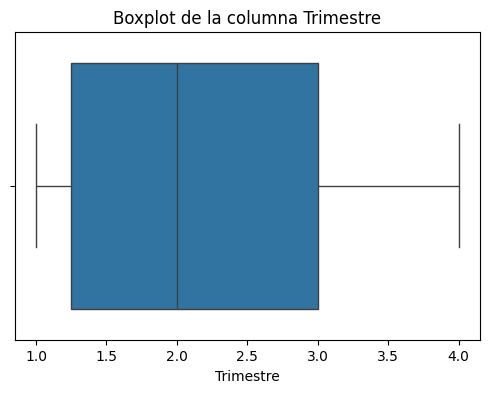

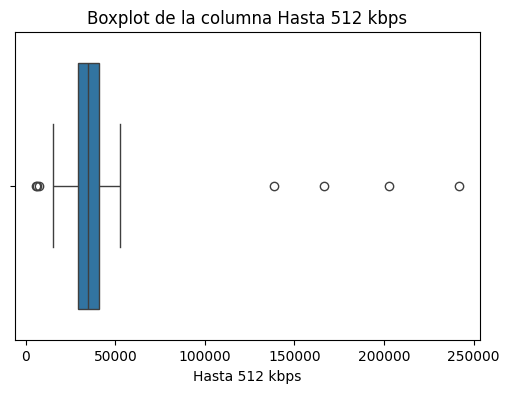

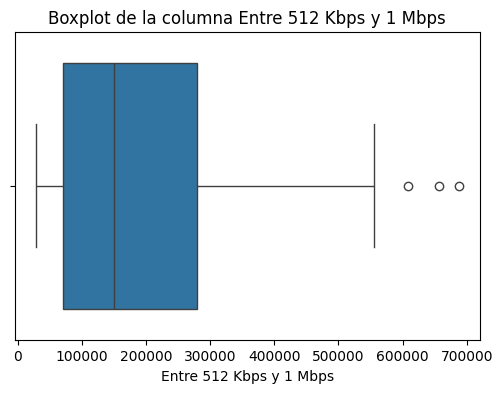

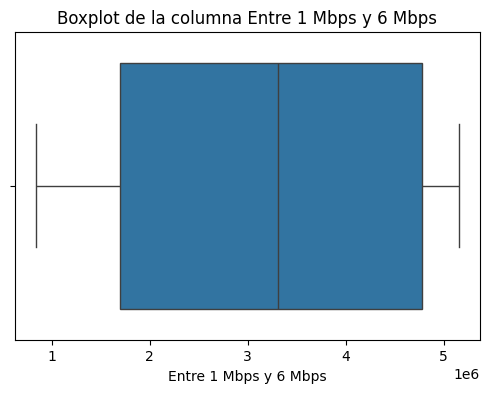

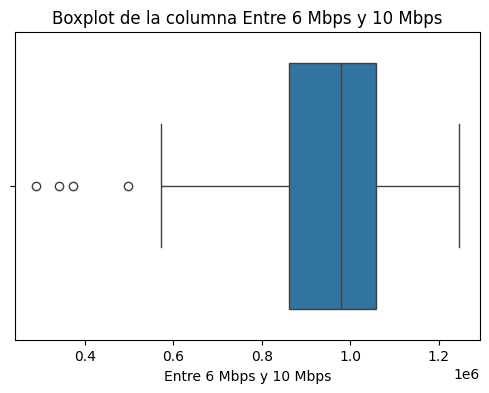

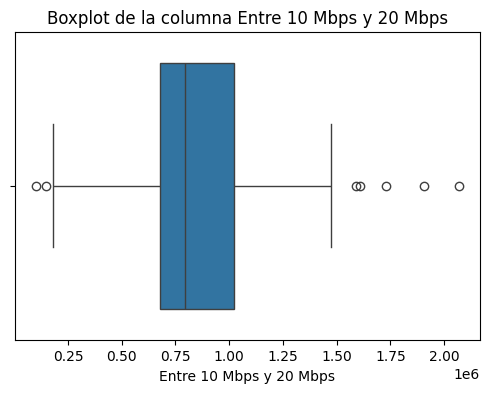

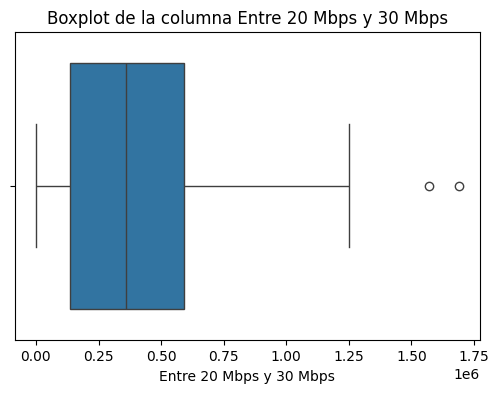

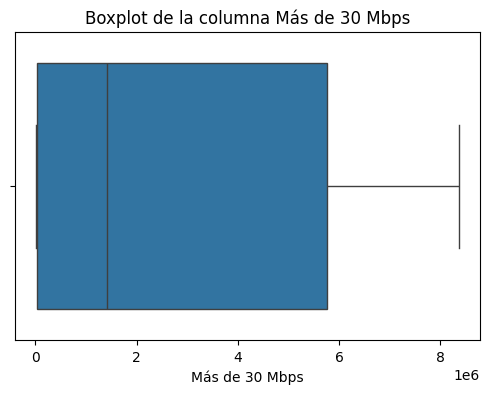

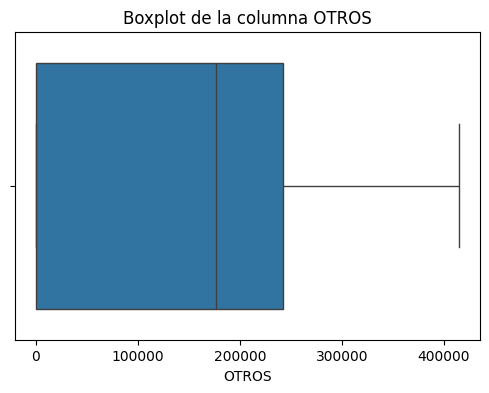

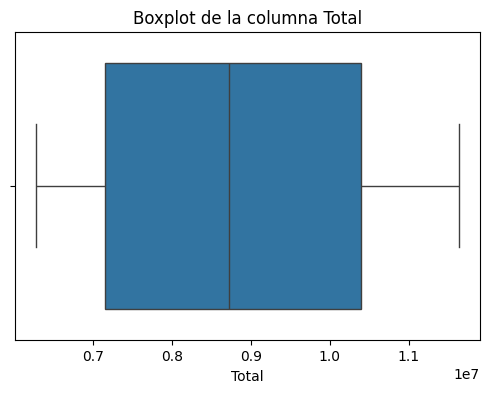

In [25]:
# Visualizar valores atípicos con un gráfico de caja
for columna in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[columna])
    plt.title(f"Boxplot de la columna {columna}")
    plt.show()

In [26]:
# Mostrar la cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
Año                        0
Trimestre                  0
Hasta 512 kbps             0
Entre 512 Kbps y 1 Mbps    0
Entre 1 Mbps y 6 Mbps      0
Entre 6 Mbps y 10 Mbps     0
Entre 10 Mbps y 20 Mbps    0
Entre 20 Mbps y 30 Mbps    0
Más de 30 Mbps             0
OTROS                      0
Total                      0
Trimestre_Label            0
dtype: int64


In [27]:
# Visualizar distribuciones de columnas con valores negativos
for columna in columnas_negativas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[columna], kde=True, bins=20)
    plt.title(f"Distribución de la columna '{columna}' con valores negativos")
    plt.show()

In [28]:
# Contar cuántos valores negativos hay en cada columna
for columna in columnas_negativas:
    negativos = df[columna] < 0
    print(f"\nValores negativos en la columna '{columna}': {negativos.sum()}")

In [29]:
# Reemplazar valores negativos por NaN
df.loc[df.select_dtypes(include=[np.number]).lt(0).any(axis=1), columnas_negativas] = np.nan
print("\nValores negativos reemplazados por NaN.")


Valores negativos reemplazados por NaN.


In [30]:
# Confirmar que los valores negativos han sido reemplazados por NaN
print("\nConfirmando reemplazo de valores negativos por NaN:")
print(df.isnull().sum())


Confirmando reemplazo de valores negativos por NaN:
Año                        0
Trimestre                  0
Hasta 512 kbps             0
Entre 512 Kbps y 1 Mbps    0
Entre 1 Mbps y 6 Mbps      0
Entre 6 Mbps y 10 Mbps     0
Entre 10 Mbps y 20 Mbps    0
Entre 20 Mbps y 30 Mbps    0
Más de 30 Mbps             0
OTROS                      0
Total                      0
Trimestre_Label            0
dtype: int64


In [31]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PROYECTO_IND_2\DATASET_LIMPIO\Totales Accesos por rango.csv


In [32]:
# 16: Análisis de distribuciones (skewness y kurtosis)

# Excluir la columna 'Año' de las columnas numéricas
df_numerico_sin_ano = df.select_dtypes(include=[np.number])

print("\nSkewness (Asimetría) de las columnas numéricas:")
print(df_numerico_sin_ano.skew())

print("\nKurtosis (Curtosis) de las columnas numéricas:")
print(df_numerico_sin_ano.kurtosis())


Skewness (Asimetría) de las columnas numéricas:
Trimestre                  0.070729
Hasta 512 kbps             2.916638
Entre 512 Kbps y 1 Mbps    1.084979
Entre 1 Mbps y 6 Mbps     -0.166518
Entre 6 Mbps y 10 Mbps    -1.289947
Entre 10 Mbps y 20 Mbps    0.770545
Entre 20 Mbps y 30 Mbps    1.105722
Más de 30 Mbps             0.575531
OTROS                      0.147958
Total                      0.221127
dtype: float64

Kurtosis (Curtosis) de las columnas numéricas:
Trimestre                 -1.371727
Hasta 512 kbps             8.238244
Entre 512 Kbps y 1 Mbps    0.055308
Entre 1 Mbps y 6 Mbps     -1.353750
Entre 6 Mbps y 10 Mbps     1.240613
Entre 10 Mbps y 20 Mbps    0.557800
Entre 20 Mbps y 30 Mbps    0.880793
Más de 30 Mbps            -1.297937
OTROS                     -1.156481
Total                     -1.326602
dtype: float64


In [33]:
# 17: Verificar la existencia de multicolinealidad entre variables numéricas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcular VIF para variables numéricas
X = df.select_dtypes(include=[np.number])

# Rellenar valores NaN con la media de la columna
X = X.fillna(X.mean())

X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif)



VIF (Factor de Inflación de la Varianza):
                   Variable          VIF
0                     const  3540.635584
1                 Trimestre     1.088237
2            Hasta 512 kbps          inf
3   Entre 512 Kbps y 1 Mbps          inf
4     Entre 1 Mbps y 6 Mbps          inf
5    Entre 6 Mbps y 10 Mbps          inf
6   Entre 10 Mbps y 20 Mbps          inf
7   Entre 20 Mbps y 30 Mbps          inf
8            Más de 30 Mbps          inf
9                     OTROS          inf
10                    Total          inf


c:\Program Files\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


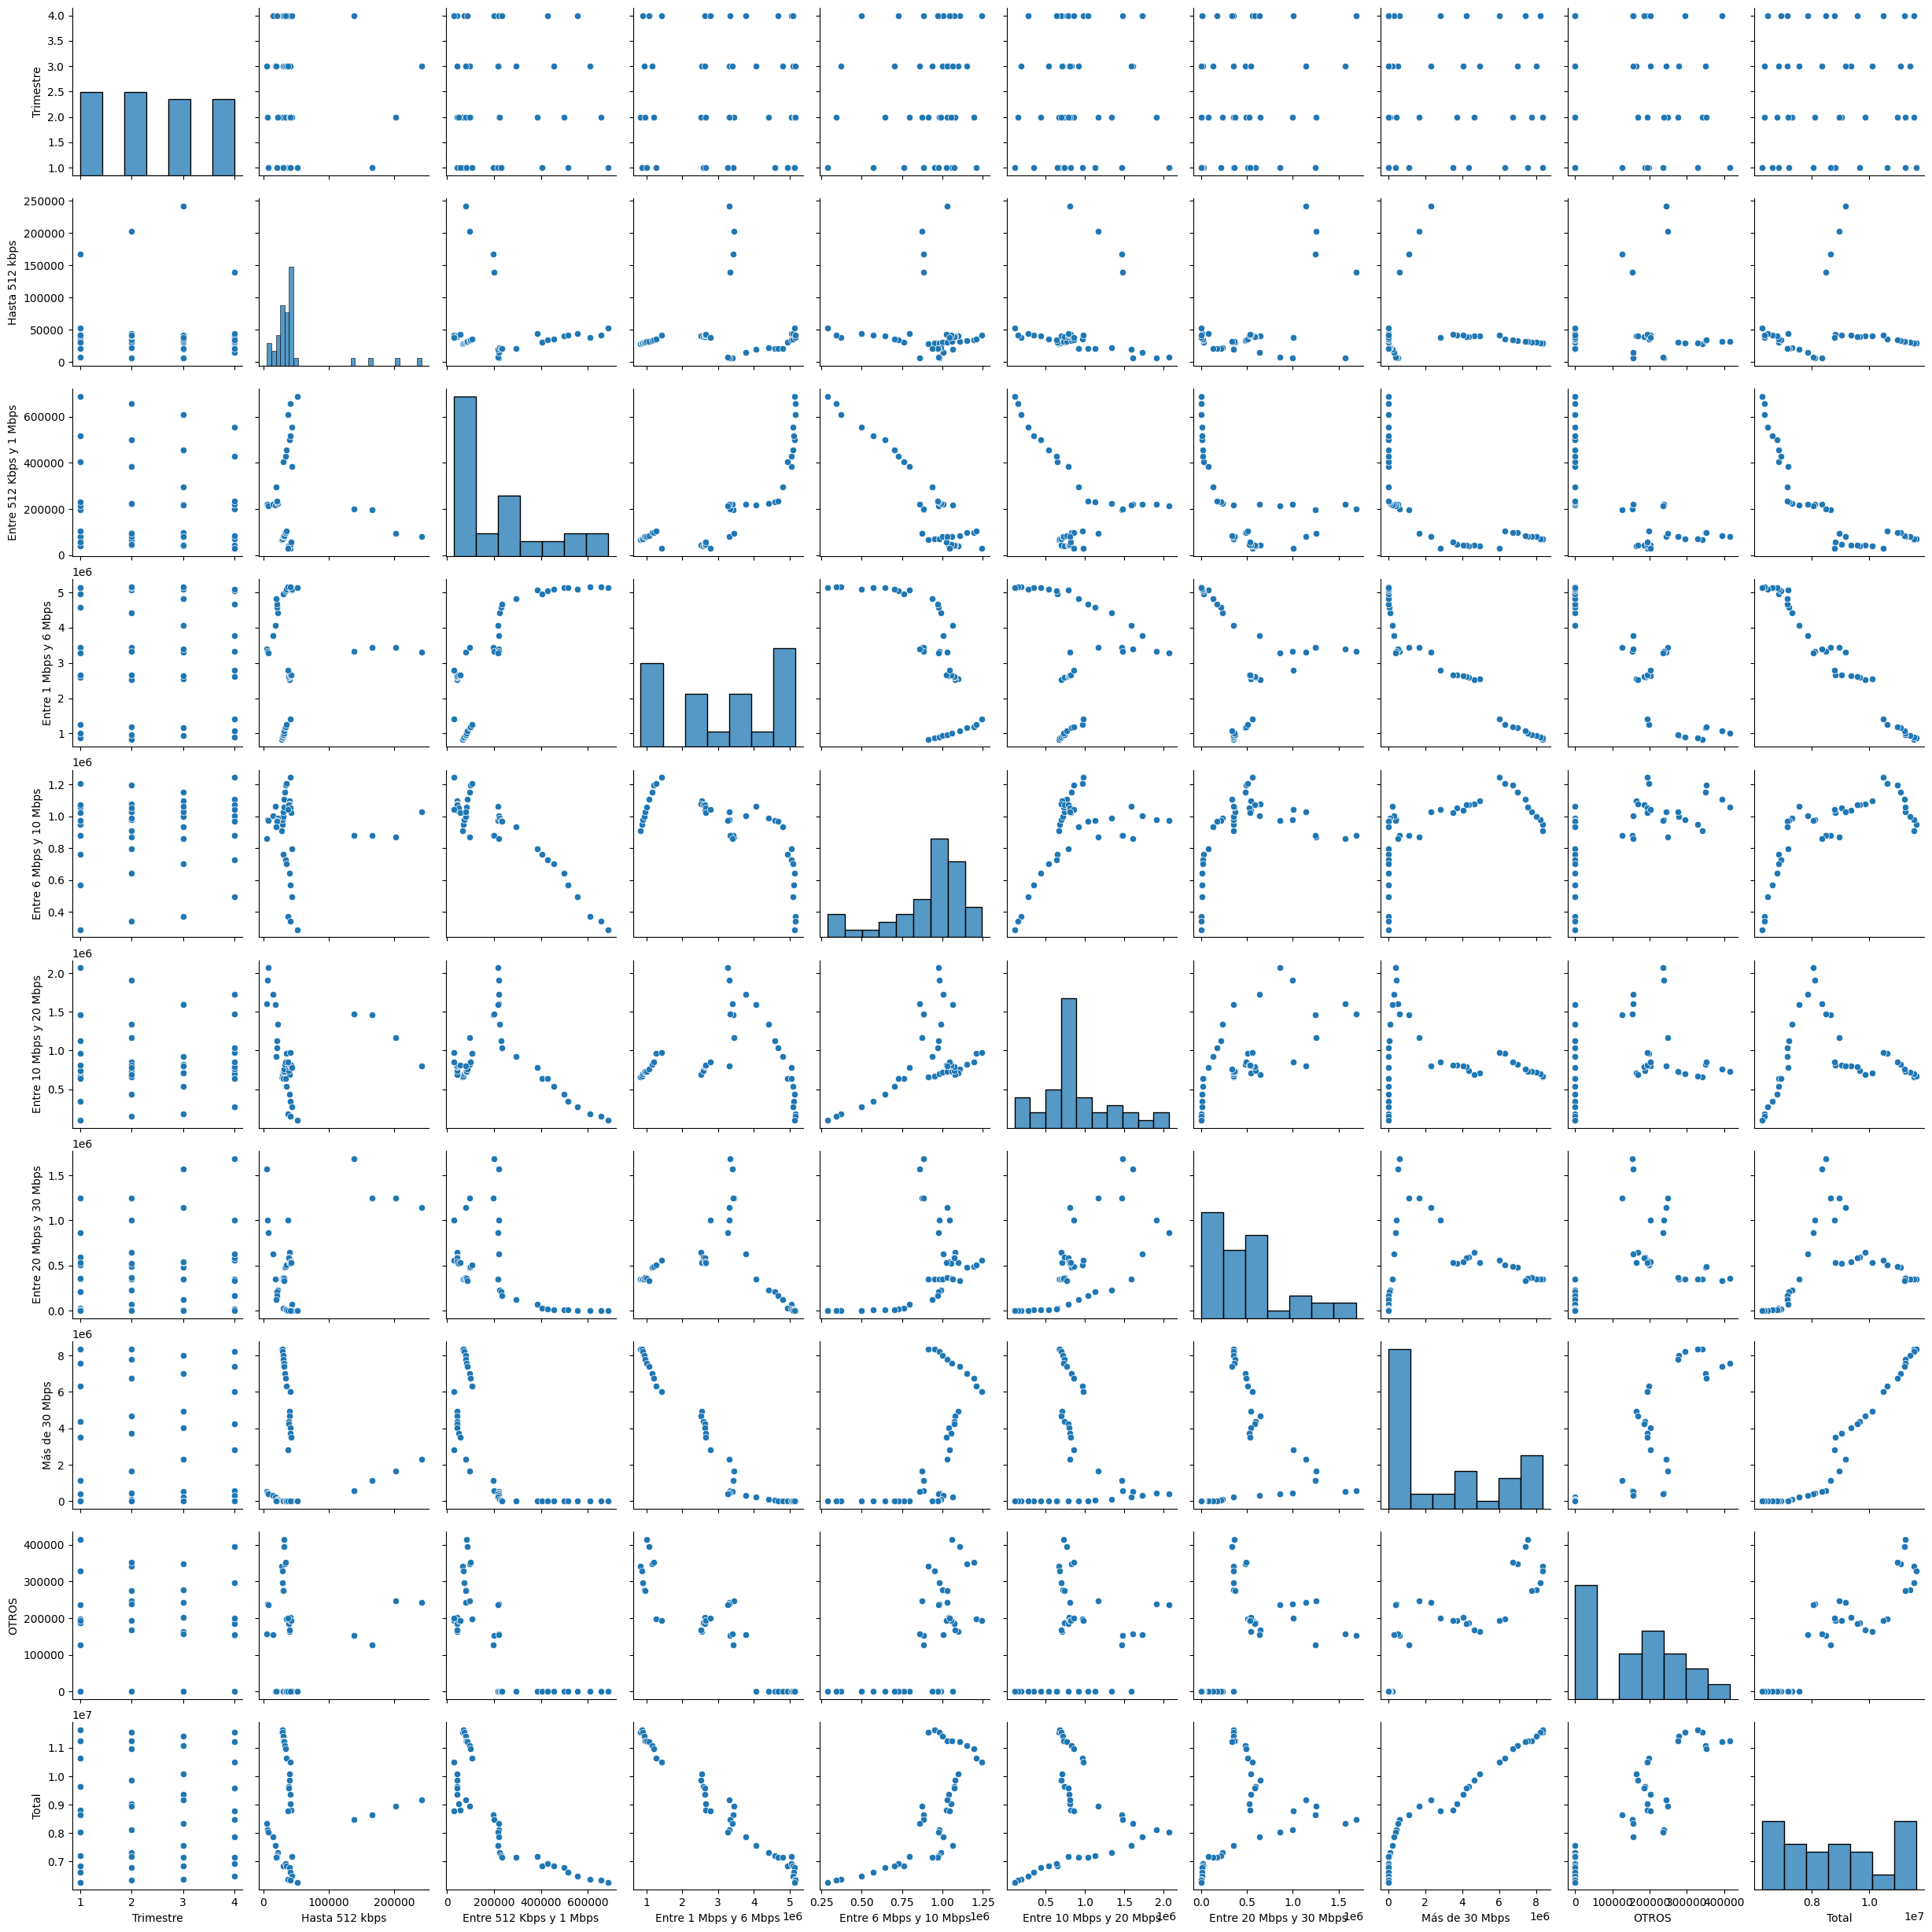

In [34]:
# 18: Visualizar la relación entre variables
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

In [35]:
# 19: Agrupamiento por categorías
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(df.groupby(columna).describe())


Estadísticas por grupo de 'Año':
           Trimestre                                           Hasta 512 kbps  \
               count mean       std  min   25%  50%   75%  max          count   
Año                                                                             
2014-01-01       4.0  2.5  1.290994  1.0  1.75  2.5  3.25  4.0            4.0   
2015-01-01       4.0  2.5  1.290994  1.0  1.75  2.5  3.25  4.0            4.0   
2016-01-01       4.0  2.5  1.290994  1.0  1.75  2.5  3.25  4.0            4.0   
2017-01-01       4.0  2.5  1.290994  1.0  1.75  2.5  3.25  4.0            4.0   
2018-01-01       4.0  2.5  1.290994  1.0  1.75  2.5  3.25  4.0            4.0   
2019-01-01       4.0  2.5  1.290994  1.0  1.75  2.5  3.25  4.0            4.0   
2020-01-01       4.0  2.5  1.290994  1.0  1.75  2.5  3.25  4.0            4.0   
2021-01-01       4.0  2.5  1.290994  1.0  1.75  2.5  3.25  4.0            4.0   
2022-01-01       4.0  2.5  1.290994  1.0  1.75  2.5  3.25  4.0            4

In [36]:
# 20: Verificar duplicados

print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
0



Estadísticas por grupo de 'Año':
            Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
Año                                                              
2014-01-01        2.5        43813.25                626698.50   
2015-01-01        2.5        37788.50                475066.25   
2016-01-01        2.5        28816.00                329210.50   
2017-01-01        2.5        19270.50                223099.00   
2018-01-01        2.5        39424.00                214164.50   
2019-01-01        2.5       162337.00                100316.25   
2020-01-01        2.5        41034.00                 47762.50   
2021-01-01        2.5        40273.75                 38414.00   
2022-01-01        2.5        33387.75                 96683.25   
2023-01-01        2.5        30561.50                 78451.00   
2024-01-01        1.5        28476.00                 68189.50   

            Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  \
Año                                           

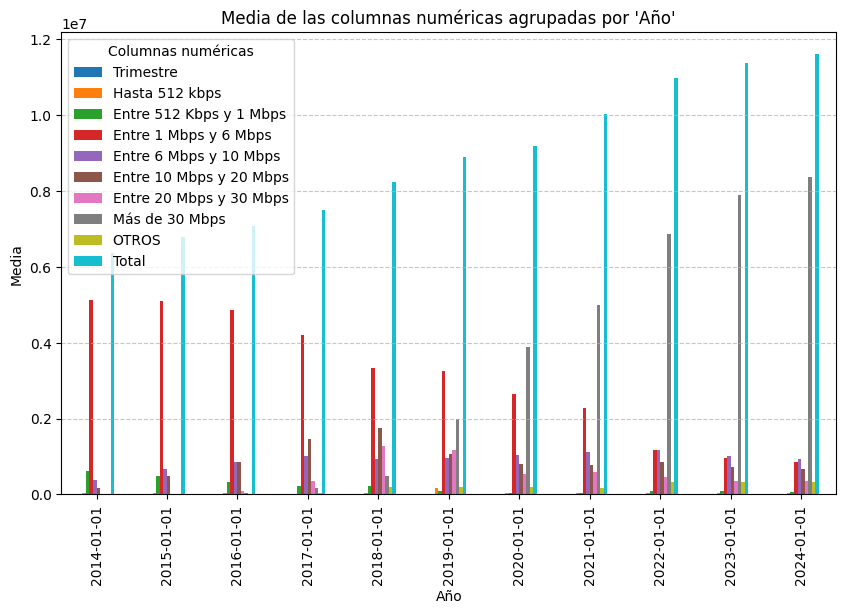


Estadísticas por grupo de 'Trimestre_Label':
                 Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
Trimestre_Label                                                       
Q1                     1.0    45088.181818            236791.454545   
Q2                     2.0    48252.545455            219605.272727   
Q3                     3.0    50347.300000            214017.100000   
Q4                     4.0    43355.600000            189530.700000   

                 Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  \
Trimestre_Label                                                  
Q1                        3.168761e+06           888523.181818   
Q2                        3.154859e+06           899546.000000   
Q3                        3.312515e+06           924659.400000   
Q4                        3.072235e+06           953488.300000   

                 Entre 10 Mbps y 20 Mbps  Entre 20 Mbps y 30 Mbps  \
Trimestre_Label                                              

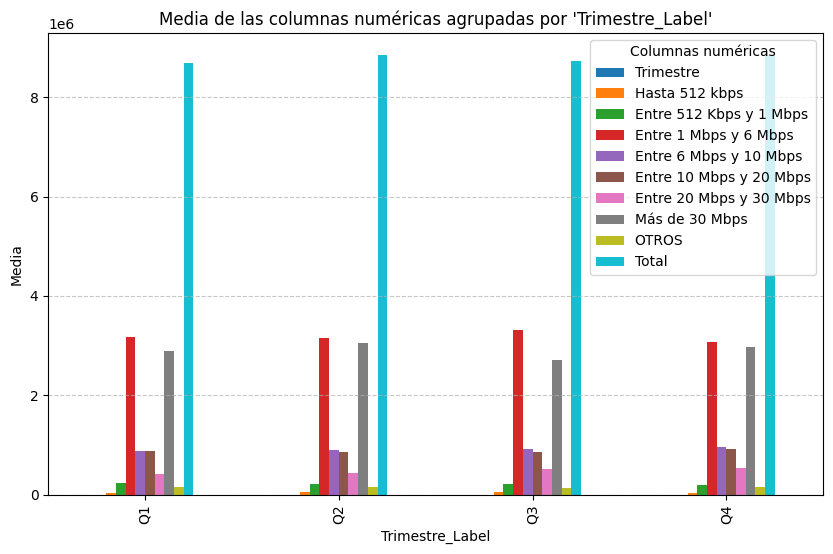

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterar sobre las columnas categóricas
for columna in df.select_dtypes(include=['object']).columns:
    # Seleccionar solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['number']).columns
    
    # Calcular la media de las columnas numéricas agrupadas por la columna categórica
    stats_por_grupo = df.groupby(columna)[columnas_numericas].mean()
    
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(stats_por_grupo)
    
    # Graficar las estadísticas
    stats_por_grupo.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Media de las columnas numéricas agrupadas por '{columna}'")
    plt.xlabel(columna)
    plt.ylabel("Media")
    plt.legend(title="Columnas numéricas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
